In [1]:
"""
1. Get historical stock prices, 20Y, Monthly
2. Get SP500 historical 20Y Monthly
3. Calc monthly outperformance vs SP500 over next 3mo, 6mo, 1Y
4. Get historical financial statements (yfinance?) 
5. Model relative forward performance ~ financials 
"""

'\n1. Get historical stock prices, 20Y, Monthly\n2. Get SP500 historical 20Y Monthly\n3. Calc monthly outperformance vs SP500 over next 3mo, 6mo, 1Y\n4. Get historical financial statements (yfinance?) \n5. Model relative forward performance ~ financials \n'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from dotenv import load_dotenv
import requests
from datetime import timedelta
import json
import numpy as np
import time


load_dotenv("../../.env",override=True)
pd.set_option("display.max_columns",500)

In [3]:
sourceFile='../../data/static_files/allCapGoodFinancials.xlsx'

In [4]:
symbolsDF = pd.read_excel(sourceFile,header=1)[['Symbol','Sector','Industry']].copy()
symbolsDF

c:\Users\jliv\Desktop\research\python_research\.venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Symbol,Sector,Industry
0,A,Health Care,Life Sciences Tools & Services
1,ABBV,Health Care,Biotechnology
2,ABC,Health Care,Health Care Providers & Services
3,ABG,Consumer Discretionary,Specialty Retail
4,ABM,Industrials,Commercial Services & Supplies
...,...,...,...
792,YELP,Communication Services,Interactive Media & Services
793,YORW,Utilities,Water Utilities
794,YPF,Energy,"Oil, Gas & Consumable Fuels"
795,ZEUS,Materials,Metals & Mining


In [5]:
consumerKey = os.environ.get("CONSUMER_KEY")

def refresh_pricing(ticker: str="$SPX.X",
                periodType: str='year',
                period: str='20',
                frequencyType: str='monthly',
                frequency: str='1'
                 ) -> pd.DataFrame:
    """_summary_

    Args:
        ticker (str, optional): _description_. Defaults to ".X".
        periodType (str, optional): _description_. Defaults to 'year'.
        period (str, optional): _description_. Defaults to '20'.
        frequencyType (str, optional): _description_. Defaults to 'monthly'.
        frequency (str, optional): _description_. Defaults to '1'.

    Returns:
        pd.DataFrame: _description_
    """
    consumerKey = os.environ.get("CONSUMER_KEY")

    url = f"https://api.tdameritrade.com/v1/marketdata/{ticker}/pricehistory?periodType={periodType}&period={period}&frequencyType={frequencyType}&frequency={frequency}"
    response = requests.get(url,
            params={'apikey' : consumerKey})
    dat = pd.DataFrame(json.loads(response.content)['candles'])
    dat['date'] = pd.to_datetime(dat['datetime'],unit='ms').dt.date
    dat.index = dat['date'].values

    dat['month'] = pd.to_datetime(dat['date']) - pd.to_timedelta(pd.to_datetime(dat['date']).dt.day-1,unit='d')
    dat['month'] = dat['month'].astype(str)
    dat['symbol'] = ticker
    return dat[['symbol','date','month','close']].copy()

SPX = refresh_pricing(ticker="$SPX.X",
                periodType='year',
                period='20',
                frequencyType='monthly',
                frequency='1'
                 )
    

In [6]:
SPX.columns = ['symbol','date','month','SP500']

SPX

,symbol,date,month,SP500
2002-12-01,$SPX.X,2002-12-01,2002-12-01,879.82001
2003-01-01,$SPX.X,2003-01-01,2003-01-01,855.70001
2003-02-01,$SPX.X,2003-02-01,2003-02-01,841.15002
2003-03-01,$SPX.X,2003-03-01,2003-03-01,848.17999
2003-04-01,$SPX.X,2003-04-01,2003-04-01,916.91998
...,...,...,...,...
2022-07-01,$SPX.X,2022-07-01,2022-07-01,4130.29000
2022-08-01,$SPX.X,2022-08-01,2022-08-01,3955.00000
2022-09-01,$SPX.X,2022-09-01,2022-09-01,3585.62000
2022-10-01,$SPX.X,2022-10-01,2022-10-01,3871.98000


In [7]:


def stock_refresh(symbolsDF):
    stockDat = pd.DataFrame()
    for S in symbolsDF['Symbol']:
        try:
            tmp = refresh_pricing(ticker=S,
                        periodType='year',
                        period='20',
                        frequencyType='monthly',
                        frequency='1'
                        )

            stockDat = pd.concat([stockDat,tmp])

            print(S)
            time.sleep(.4)
        except:
            pass
    
    stockDat.to_csv("../../data/static_files/20Y_stocks_monthly.csv")
    return

refresh=True
if refresh:
    stock_refresh(symbolsDF)

stockDat = pd.read_csv("../../data/static_files/20Y_stocks_monthly.csv")

A
ABBV
ABC
ABG
ABM
ACA
ACHC
ACI
ACLS
ACNT
ADC
ADM
ADP
ADUS
AEE
AEIS
AEP
AFYA
AGCO
AGM
AGR
AGRO
AHCO
AIG
AIR
AIT
AIV
AJG
AKO.A
AKO.B
ALB
ALE
ALG
ALSN
ALTO
AMAL
AME
AMGN
AMK
AMKR
AMN
AMOV
AMP
AMPH
AMR
AMTB
AMX
AN
ANDE
ANET
AON
APD
APH
APLE
APOG
AR
ARCH
ARCO
ARI
ARKR
ARMK
ARTNA
ASB
ASO
ASR
ASRT
ASYS
ATAX
ATCO
ATKR
ATO
ATR
ATRI
ATSG
AVD
AVT
AVY
AXP
AYI
BANR
BAP
BBAR
BBCP
BBSI
BBVA
BBW
BCBP
BCC
BCH
BCML
BCO
BCOR
BCPC
BDX
BECN
BELFA
BF.B
BFIN
BGSF
BHE
BHF
BHP
BJ
BKE
BKH
BKU
BLX
BMA
BMI
BMRC
BMY
BPOP
BPRN
BRC
BRID
BRKR
BRO
BRT
BRX
BRY
BSAC
BSBK
BSET
BSM
BSMX
BSVN
BTU
BUSE
BWA
BWB
BWXT
BYD
CAJ
CAKE
CAL
CALB
CALM
CAPL
CASS
CASY
CAT
CATC
CATY
CBFV
CBNK
CBT
CBZ
CC
CCB
CCEP
CCNE
CCRN
CDW
CEIX
CF
CFB
CFR
CHCO
CHDN
CHEF
CHH
CHK
CHMG
CHRW
CHS
CHT
CHX
CIVB
CIVI
CLFD
CLH
CLMB
CLR
CLW
CMC
CMG
CMRE
CNC
CNP
CNXN
COFS
COKE
COP
CORT
COST
CPA
CPAC
CPE
CPHC
CPLP
CPSH
CRK
CRT
CRWS
CSIQ
CSL
CSWI
CTAS
CTRA
CTRM
CTS
CTVA
CVEO
CVI
CVV
CVX
CWCO
CZWI
DAR
DBI
DCI
DCO
DCP
DDS
DE
DECK
DEN
DINO
DK
DLTR
DMLP
DNOW
DOW
DQ


In [8]:
def scrape_table(symbolsDF: pd.DataFrame,
                        link: str,
                        destination: str,
                        columns: list,
                        refresh: bool=False,
                        tbl_index: int=0) -> pd.DataFrame:
    """_summary_

    Args:
        symbolsDF (pd.DataFrame): _description_
        link (str): _description_
        destination (str): _description_
        columns (_type_, optional): _description_. Defaults to False.

    Returns:
        pd.DataFrame: _description_
    """
    if refresh:

        df = pd.DataFrame()
        for S in symbolsDF['Symbol']:
            try:
                url = link.format(S=S)
                tbl = pd.read_html(url)[tbl_index]
                tbl.columns =columns
                tbl['symbol'] = S
                df = pd.concat([df,tbl])

            except:
                pass

        df.to_csv(destination)
        
        
    df = pd.read_csv(destination)

    return df

refresh=True

roi = scrape_table(symbolsDF=symbolsDF,
                        link="https://www.macrotrends.net/stocks/charts/{S}/apple/roi",
                        destination="../../data/static_files/roi.csv",
                        columns=[ 'date','netincttm','investments','roi'],
                        refresh= refresh)

roa = scrape_table(symbolsDF=symbolsDF,
                        link="https://www.macrotrends.net/stocks/charts/{S}/apple/roa",
                        destination="../../data/static_files/roa.csv",
                        columns=[ 'date','netincttm','assets','roa'],
                        refresh= refresh)

roe = scrape_table(symbolsDF=symbolsDF,
                        link="https://www.macrotrends.net/stocks/charts/{S}/apple/roe",
                        destination="../../data/static_files/roe.csv",
                        columns=[ 'date','netincttm','equity','roe'],
                        refresh= refresh)

npm = scrape_table(symbolsDF=symbolsDF,
                        link="https://www.macrotrends.net/stocks/charts/{S}/apple/net-profit-margin",
                        destination="../../data/static_files/npm.csv",
                        columns=[ 'date','revttm','netincttm','profit_margin'],
                        refresh= refresh)

pe = scrape_table(symbolsDF=symbolsDF,
                        link="https://www.macrotrends.net/stocks/charts/{S}/apple/pe-ratio",
                        destination="../../data/static_files/pe.csv",
                        columns=[ 'date','price','epsttm','pe'],
                        refresh= refresh)

pfcf = scrape_table(symbolsDF=symbolsDF,
                        link="https://www.macrotrends.net/stocks/charts/{S}/apple/price-fcf",
                        destination="../../data/static_files/pfcf.csv",
                        columns=[ 'date','price','fcfttm','pfcf'],
                        refresh= refresh)


eps = scrape_table(symbolsDF=symbolsDF,
                        link="https://www.macrotrends.net/stocks/charts/{S}/apple/eps-earnings-per-share-diluted",
                        destination="../../data/static_files/eps.csv",
                        columns=[ 'date','eps'],
                        refresh= refresh,
                        tbl_index=1)

n_employees = scrape_table(symbolsDF=symbolsDF,
                        link="https://www.macrotrends.net/stocks/charts/{S}/apple/number-of-employees",
                        destination="../../data/static_files/emps.csv",
                        columns=[ 'date','emps'],
                        refresh= refresh,
                        tbl_index=0)



In [9]:

def make_month(df):

    df['month'] = pd.to_datetime(df['date']) - pd.to_timedelta(pd.to_datetime(df['date']).dt.day-1,unit='d')
    df['month'] = df['month'].astype(str)

    return df


pe=make_month(pe)
pfcf=make_month(pfcf)
eps=make_month(eps)
npm=make_month(npm)
roe=make_month(roe)
roa=make_month(roa)
roi=make_month(roi)
n_employees=make_month(n_employees)

n_employees['year'] = n_employees['date'].astype(str)



In [10]:

X = stockDat.merge(SPX[['month','SP500']],on='month',how='left')
def make_gain_calcs(X: pd.DataFrame,
                    col: str) -> pd.DataFrame:
    """_summary_

    Args:
        X (pd.DataFrame): _description_
        col (str): _description_

    Returns:
        pd.DataFrame: _description_
    """
    X[f'{col}_3MO'] = X.groupby(['symbol'])[col].shift(-3)
    X[f'{col}_6MO'] = X.groupby(['symbol'])[col].shift(-6)
    X[f'{col}_1Y'] = X.groupby(['symbol'])[col].shift(-12)

    X[f'{col}_3MO_GAIN'] = X[f'{col}_3MO']/X[col]
    X[f'{col}_6MO_GAIN'] = X[f'{col}_6MO']/X[col]
    X[f'{col}_1Y_GAIN'] = X[f'{col}_1Y']/X[col]

    return X


X=make_gain_calcs(X,'SP500')
X=make_gain_calcs(X,'close')

X['3MO_PERF'] = X['close_3MO_GAIN'] - X['SP500_3MO_GAIN']
X['6MO_PERF'] = X['close_6MO_GAIN'] - X['SP500_6MO_GAIN']
X['1Y_PERF'] = X['close_1Y_GAIN'] - X['SP500_1Y_GAIN']

In [11]:
X = X.merge(pe[['symbol','month','pe']],on=['symbol','month'],how='left')
X = X.merge(pfcf[['symbol','month','pfcf']],on=['symbol','month'],how='left')
X = X.merge(eps[['symbol','month','eps']],on=['symbol','month'],how='left')
X = X.merge(npm[['symbol','month','profit_margin']],on=['symbol','month'],how='left')
X = X.merge(roe[['symbol','month','roe']],on=['symbol','month'],how='left')
X = X.merge(roa[['symbol','month','roa']],on=['symbol','month'],how='left')
X = X.merge(roi[['symbol','month','roi']],on=['symbol','month'],how='left')

In [12]:
X['year']=pd.to_datetime(X['month']).dt.year.astype(str)
X = X.merge(n_employees[['symbol','year','emps']],on=['symbol','year'],how='left')


In [13]:
industries = symbolsDF.copy()
industries.columns = ['symbol','sector','industry']

X = X.merge(industries[['symbol','sector']],on='symbol',how='left')



In [14]:
for i in X['sector'].unique():
    X[i]=np.where(X['sector']==i,1,0)
    

In [15]:
X['eps'] = X['eps'].str.replace("$","",regex=False).str.replace(",","",regex=False).astype(float)
X['profit_margin'] = X['profit_margin'].str.replace("%","",regex=False).astype(float)/100
X['roe'] = X['roe'].str.replace("%","",regex=False).astype(float)/100
X['roa'] = X['roa'].str.replace("%","",regex=False).astype(float)/100
X['roi'] = X['roi'].str.replace("%","",regex=False).astype(float)/100

In [16]:
X['SP500_3MO_PAST']=X.groupby(['symbol'])['SP500'].shift(3)
X['SP500_3MO_PAST_GAIN'] = X['SP500']/X['SP500_3MO_PAST']

X['close_3MO_PAST']=X.groupby(['symbol'])['close'].shift(3)
X['close_3MO_PAST_GAIN'] = X['close']/X['close_3MO_PAST']

X['3MO_PERF_PAST'] = X['close_3MO_PAST_GAIN'] - X['SP500_3MO_PAST_GAIN']


In [17]:
for f in ['pe','pfcf','eps','profit_margin','roe','roa','roi']:
    X[f]=X.groupby('symbol')[f].ffill()

In [18]:

def MinMaxFN(x):
    return (x - np.nanmin(x))/(np.nanmax(x)-np.nanmin(x))

origFeatures = ['pe','pfcf','eps','profit_margin','roe','roa','roi','3MO_PERF_PAST']

for f in origFeatures:
    X[f'{f}_scaled'] = X.groupby(['sector','month'],group_keys=False)[f].apply(MinMaxFN)

features = ['Health Care', 'Information Technology',
       'Industrials', 'Financials', 'Real Estate', 'Utilities',
       'Consumer Discretionary', 'Consumer Staples', 'Materials', 'Energy',
       'Communication Services']+origFeatures+[f'{f}_scaled' for f in origFeatures]
       


C:\Users\jliv\AppData\Local\Temp\ipykernel_13120\1772879869.py:2: RuntimeWarning: All-NaN axis encountered
  return (x - np.nanmin(x))/(np.nanmax(x)-np.nanmin(x))
C:\Users\jliv\AppData\Local\Temp\ipykernel_13120\1772879869.py:2: RuntimeWarning: All-NaN axis encountered
  return (x - np.nanmin(x))/(np.nanmax(x)-np.nanmin(x))
C:\Users\jliv\AppData\Local\Temp\ipykernel_13120\1772879869.py:2: RuntimeWarning: All-NaN axis encountered
  return (x - np.nanmin(x))/(np.nanmax(x)-np.nanmin(x))
C:\Users\jliv\AppData\Local\Temp\ipykernel_13120\1772879869.py:2: RuntimeWarning: All-NaN axis encountered
  return (x - np.nanmin(x))/(np.nanmax(x)-np.nanmin(x))
C:\Users\jliv\AppData\Local\Temp\ipykernel_13120\1772879869.py:2: RuntimeWarning: All-NaN axis encountered
  return (x - np.nanmin(x))/(np.nanmax(x)-np.nanmin(x))
C:\Users\jliv\AppData\Local\Temp\ipykernel_13120\1772879869.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (x - np.nanmin(x))/(np.nanmax(x)-np.nanmin(x))
C:\

In [19]:
X[features] = X[features].fillna(-1)
X[features] =np.where(X[features]==np.inf,
    -1,X[features]  )

In [20]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42,max_depth=15,n_estimators=50)




In [21]:

kpi = '1Y_PERF'


In [22]:

trainingMask = X['month']<'2021-06-01'
kpiMask = ~X[kpi].isna()
monthlyMask =pd.to_datetime( X['month']).dt.month.isin([3,6,9,12])

xt = X[trainingMask&kpiMask&monthlyMask][features].copy()
yt = X[trainingMask&kpiMask&monthlyMask][kpi].copy()


In [23]:
model.fit(xt,yt)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [24]:
pred = model.predict(xt)

(-0.5, 1.5)

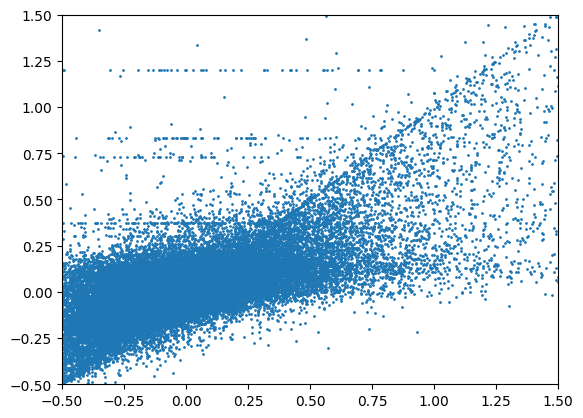

In [25]:
plt.scatter(yt,pred,s=1)
plt.xlim(-.5,1.5)
plt.ylim(-.5,1.5)


In [26]:
valMask = (X['month']>='2021-06-01') & kpiMask&monthlyMask

xv = X[valMask][features].copy()
yv = X[valMask][kpi]

In [27]:
valpred = model.predict(xv)

(-0.5, 1.0)

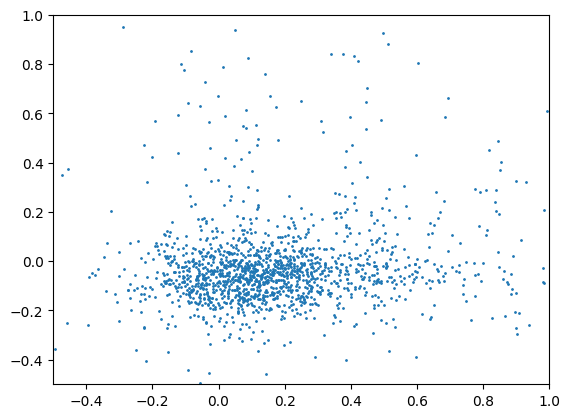

In [28]:
plt.scatter(yv,valpred,s=1)
plt.xlim(-.5,1)
plt.ylim(-.5,1)

In [29]:
thisMonth = X[X['month']=='2022-11-01'].copy()
thisMonth['pred'+kpi]=model.predict(thisMonth[features])
thisMonth[['symbol','close',
    'pe','pfcf','eps','profit_margin','roe','roa','roi','pred'+kpi]].sort_values(by='pred1Y_PERF',ascending=False).head(50)

,symbol,close,pe,pfcf,eps,profit_margin,roe,roa,roi,pred1Y_PERF
112196,PR,10.59,8.27,4.21,-1.00,-1.0000,-1.0000,-1.0000,-1.0000,92.355377
70637,HUM,552.05,43.61,8.38,9.39,0.0307,0.1775,0.0596,0.1435,1.280977
86187,MGY,26.30,8.65,5.39,1.29,0.4803,0.6639,0.4066,0.6725,0.905235
10454,ARCH,161.95,3.07,3.22,8.68,0.2969,1.0947,0.4898,0.9621,0.699795
110316,PLUS,48.88,12.53,0.00,0.84,0.0553,0.1591,0.0855,0.2229,0.598181
55371,FINV,4.74,3.73,0.00,0.30,0.1411,0.0277,0.0162,-1.0000,0.589252
8429,AMR,177.22,2.59,3.79,29.97,0.3385,1.7274,0.6690,1.3745,0.559185
154731,YELP,30.31,48.11,15.10,0.11,0.0429,0.0645,0.0457,-1.0000,0.549327
72562,IBEX,19.99,16.39,14.67,0.27,0.0466,0.2473,0.0782,0.3191,0.518476
9939,APH,76.27,25.59,30.17,0.80,0.1499,0.2864,0.1248,0.2220,0.500846


In [ ]:
X[X['symbol']=='FNKO'].tail(10)